Interacting with manifold
====================
The basic interface of _StochMan_ is that you first define a manifold, and then use this to compute geodesics, etc. The manifold objects will generally depend on data as the focus of _StochMan_ is on _learning manifolds_. As a first simple example of how to engage with manifolds once they have been constructed. We therefore start with with a pre-implemented manifold that correspond to the paper:

_A Locally Adaptive Normal Distribution_  
Georgios Arvanitidis, Lars Kai Hansen, and Søren Hauberg.  
Neural Information Processing Systems (NeurIPS), 2016.  

Here the observation space is endowed with a Riemannian metric which is simply the inverse covariance of data computed locally.

To get started we import relevant modules

In [1]:
#import sys
#sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from sklearn.decomposition import PCA

import stochman

We'll be using MNIST as a toy example to get started. We select 1000 observations of one-digits and perform PCA to get a two-dimensional representation. We do this to ensure that we can visualize the results.

In [2]:
def get_subset_mnist(n: int = 1000):
    dataset = MNIST(root="data/", download=True)
    idx_ones = dataset.targets == 1
    mnist_ones = dataset.data[idx_ones].to(torch.float32)
    N = mnist_ones.shape[0]
    idx = torch.randint(N, [n,])
    data = mnist_ones[idx].reshape(n, -1).numpy()
    low_dim_data = torch.from_numpy(PCA(n_components=2).fit_transform(data))
    return low_dim_data / low_dim_data.std(dim=0, keepdim=True)

# Read data
data = get_subset_mnist(n=1000)
data = data
N, D = data.shape

Next we construct the manifold using the predefined _LocalVarMetric_ class.

In [4]:
# Parameters for metric
sigma = 0.1
rho = 0.1

# Create metric
M = stochman.manifold.LocalVarMetric(data=data, sigma=sigma, rho=rho)

We now have a manifold to play around with. As a starting point, we will evaluate the volume measure (sometimes also called to _magnification_ _factor_ associated with the manifold in order to visualize the data and the metric.

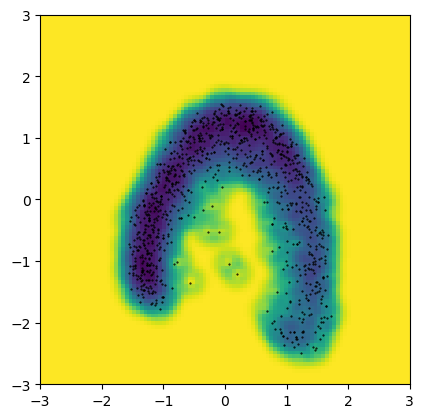

In [5]:
# Plot metric and data
with torch.no_grad():
    ran = torch.linspace(-3., 3., 100)
    gridX, gridY = torch.meshgrid([ran, ran], indexing="ij")
    grid = torch.stack((gridX.flatten(), gridY.flatten()), dim=1)  # 10000x2
    magfac = M.log_volume(grid)  # 10000
plt.imshow(magfac.view(100, 100).numpy().T, extent=(ran[0], ran[-1], ran[0], ran[-1]), origin="lower")
plt.plot(data[:, 0].numpy(), data[:, 1].numpy(), "k.", markersize=1)
plt.show()

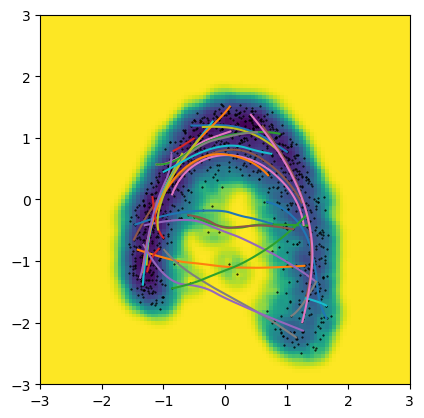

In [6]:
# Compute geodesics in parallel
n_geo = 30
p0 = data[torch.randint(high=N, size=[n_geo], dtype=torch.long)]  # 10xD
p1 = data[torch.randint(high=N, size=[n_geo], dtype=torch.long)]  # 10xD
C, success = M.connecting_geodesic(p0, p1)
dist = M.dist2(p0, p1)
plt.imshow(magfac.view(100, 100).numpy().T, extent=(ran[0], ran[-1], ran[0], ran[-1]), origin="lower")
plt.plot(data[:, 0].numpy(), data[:, 1].numpy(), "k.", markersize=1)
C.plot()
plt.show()

In [7]:
dist

tensor([ 1.1221, 26.2337, 12.8317,  0.0733, 26.6461,  7.4318,  0.8313, 33.4071,
         1.3093,  3.1514,  4.3446,  1.5265,  2.0223,  0.0685, 33.3136,  5.2292,
         5.8229,  0.4771,  0.6987,  0.1512, 14.2712,  5.4237, 27.1384,  0.1892,
         1.5653, 12.2381,  7.9714,  0.7365,  1.0920,  1.7416])

In [3]:
# Compute shooting geodesic as a sanity check
p0 = data[torch.randint(high=N, size=[1], dtype=torch.long)]  # 1xD
p1 = data[torch.randint(high=N, size=[1], dtype=torch.long)]  # 1xD
dist2 = M.dist2(p0, p1)

NameError: name 'M' is not defined

In [ ]:
plt.imshow(magfac.view(100, 100).numpy().T, extent=(ran[0], ran[-1], ran[0], ran[-1]), origin="lower")
plt.plot(data[:, 0].numpy(), data[:, 1].numpy(), "k.", markersize=1)
C.plot()
plt.show()